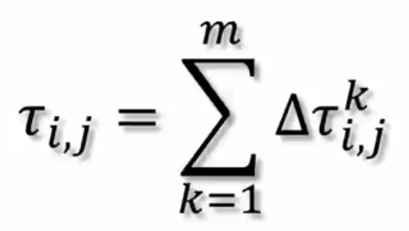
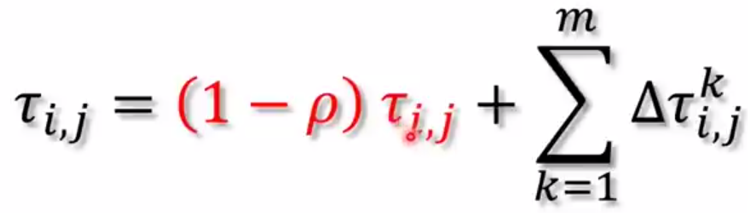
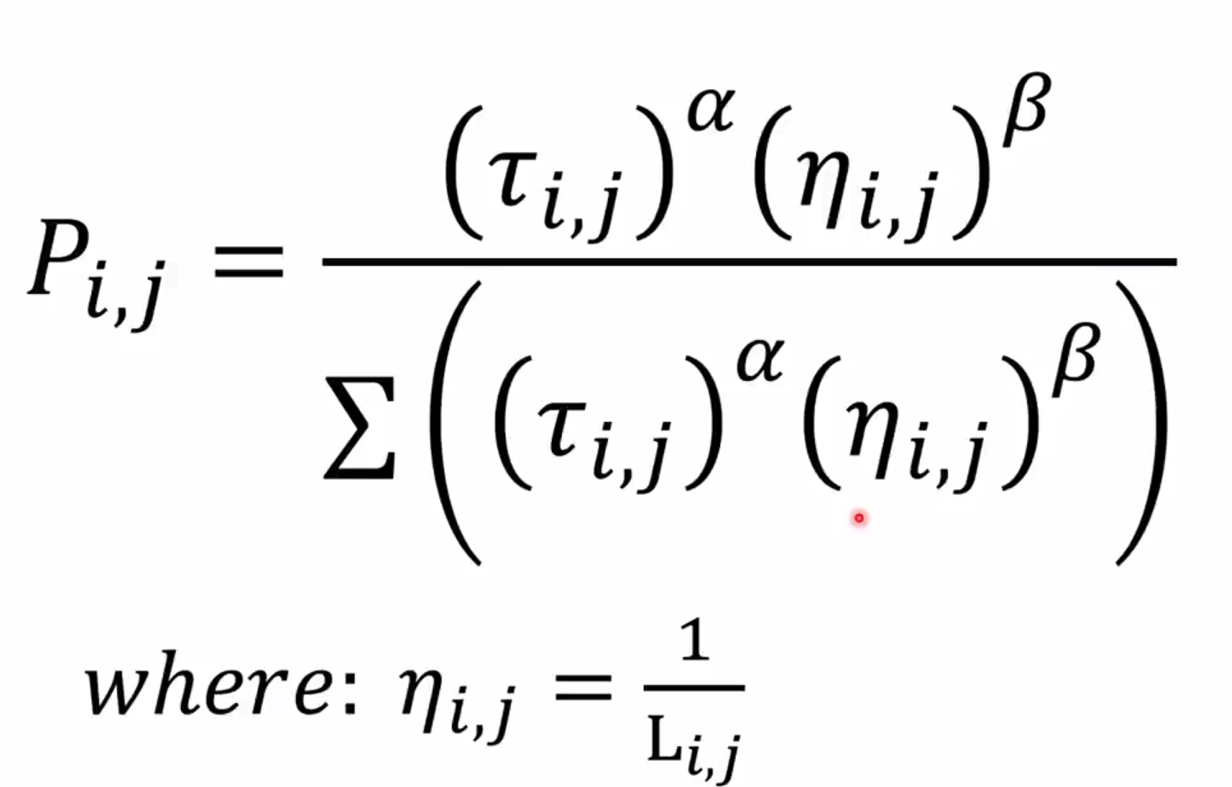

City Names and Coordinates:
City_1: [0.55564593 0.68847804]
City_2: [0.29668872 0.3537395 ]
City_3: [0.55588621 0.19394184]
City_4: [0.88831639 0.42063435]
City_5: [0.72457676 0.09248234]
City_6: [0.46294492 0.7180551 ]
City_7: [0.69434677 0.75372023]
City_8: [0.94236925 0.42069657]
City_9: [0.56231099 0.22252994]
City_10: [0.14647453 0.42975442]

Best Solution (City Order):
['City_6', 'City_1', 'City_7', 'City_4', 'City_8', 'City_5', 'City_3', 'City_9', 'City_2', 'City_10']
Best Length: 2.2028550960659192


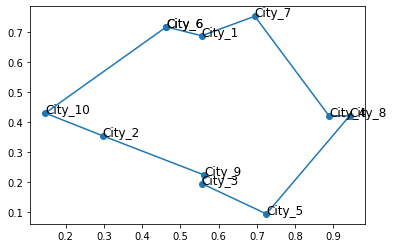

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
num_cities = 10
num_ants = 20
num_iterations = 100
alpha = 1.0  # Importance of pheromone
beta = 2.0   # Importance of heuristic information (inverse of distance)
evaporation_rate = 0.5
Q = 100      # Pheromone deposit factor

# Generate random cities with names
city_names = [f"City_{i+1}" for i in range(num_cities)]
cities = np.random.rand(num_cities, 2)
distances = np.linalg.norm(cities[:, np.newaxis] - cities[np.newaxis, :], axis=2)

# Print city names and their coordinates
print("City Names and Coordinates:")
for name, coord in zip(city_names, cities):
    print(f"{name}: {coord}")

# Initialize pheromone levels
pheromone = np.ones((num_cities, num_cities))

# Construct solution
def construct_solution(pheromone, distances, alpha, beta):
    num_cities = len(distances)
    solution = []
    visited = set()
    current_city = np.random.randint(num_cities)
    solution.append(current_city)
    visited.add(current_city)
    
    while len(solution) < num_cities:
        probabilities = []
        for city in range(num_cities):
            if city not in visited:
                pheromone_level = pheromone[current_city, city] ** alpha
                heuristic_level = (1.0 / distances[current_city, city]) ** beta
                probabilities.append(pheromone_level * heuristic_level)
            else:
                probabilities.append(0)
        probabilities = np.array(probabilities)
        probabilities /= probabilities.sum()
        next_city = np.random.choice(range(num_cities), p=probabilities)
        solution.append(next_city)
        visited.add(next_city)
        current_city = next_city
    
    return solution

# Update pheromone
def update_pheromone(pheromone, solutions, distances, evaporation_rate, Q):
    pheromone *= (1 - evaporation_rate)
    for solution in solutions:
        length = 0
        for i in range(len(solution) - 1):
            length += distances[solution[i], solution[i + 1]]
        length += distances[solution[-1], solution[0]]
        for i in range(len(solution) - 1):
            pheromone[solution[i], solution[i + 1]] += Q / length
        pheromone[solution[-1], solution[0]] += Q / length

# Main ACO algorithm
best_solution = None
best_length = float('inf')

for iteration in range(num_iterations):
    solutions = [construct_solution(pheromone, distances, alpha, beta) for _ in range(num_ants)]
    update_pheromone(pheromone, solutions, distances, evaporation_rate, Q)
    
    for solution in solutions:
        length = sum(distances[solution[i], solution[i + 1]] for i in range(len(solution) - 1))
        length += distances[solution[-1], solution[0]]
        if length < best_length:
            best_length = length
            best_solution = solution

# Print best solution
print("\nBest Solution (City Order):")
print([city_names[i] for i in best_solution])
print(f"Best Length: {best_length}")

# Plotting the best solution
def plot_solution(cities, solution, city_names):
    solution_cities = np.array([cities[i] for i in solution] + [cities[solution[0]]])
    plt.plot(solution_cities[:, 0], solution_cities[:, 1], 'o-')
    for i, name in enumerate([city_names[i] for i in solution] + [city_names[solution[0]]]):
        plt.text(solution_cities[i, 0], solution_cities[i, 1], name, fontsize=12)
    plt.show()

plot_solution(cities, best_solution, city_names)